# Basic EDA

## Run Script to Scrape all DW (in shell)

```shell
pipenv run python ./scrap_dw.py -v
```

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

## Load Full Text Dateframe

In [2]:
page_df = pd.read_hdf('../dw.h5', "page_df")
text_df = pd.read_hdf('../dw.h5', "text_df")
paragraph_df = pd.read_hdf('../dw.h5', "paragraph_df")

## Text Corpus QA

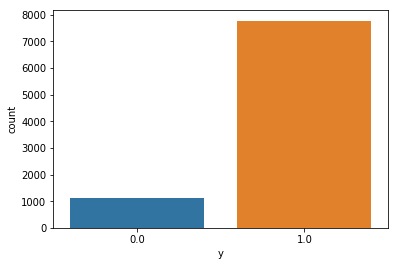

In [3]:
sns.countplot(text_df["y"])

In [4]:
text_df["wc"] = text_df["text"].apply(lambda x: len(x.split()))
text_df["pc"] = text_df["text"].apply(lambda x: len(x.split("\n")))

/Users/shlomi/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


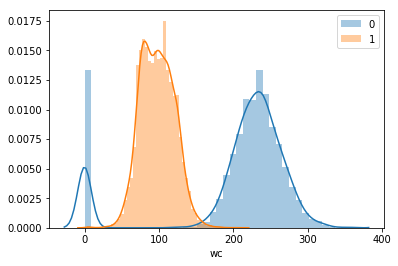

In [5]:
sns.distplot(text_df[text_df["y"] == 0]["wc"], label="0")
sns.distplot(text_df[text_df["y"] == 1]["wc"], label="1")
plt.legend()

In [6]:
text_df[text_df["y"] == 1]["pc"].describe(())

count    7777.0
mean        1.0
std         0.0
min         1.0
50%         1.0
max         1.0
Name: pc, dtype: float64

In [7]:
text_df[text_df["y"] == 0]["pc"].value_counts()

4     836
1     132
3     109
5      30
7       2
6       2
20      1
19      1
2       1
Name: pc, dtype: int64

/Users/shlomi/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


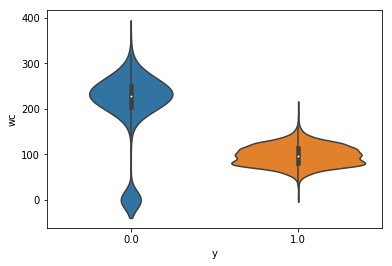

In [8]:
sns.violinplot(x="y", y ="wc", data=text_df)

/Users/shlomi/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


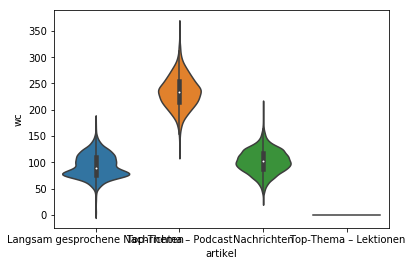

In [9]:
sns.violinplot(x="artikel", y ="wc", data=text_df)

In [ ]:
(text_df["text"]
 .apply(lambda text: max(zip(map(len, text.split()), text.split())))).sort_values().tail()

https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests

In [ ]:
from textstat.textstat import textstat
text_df["FKG"] = text_df["text"].apply(textstat.flesch_kincaid_grade)

sns.distplot(text_df[text_df["y"] == 0]["FKG"], label="0")
sns.distplot(text_df[text_df["y"] == 1]["FKG"], label="1")

plt.legend()
plt.title("Distribution Flesch-Kincaid Grade per Text by Reading Lables")

## Parapgraphs Corpus Analysis

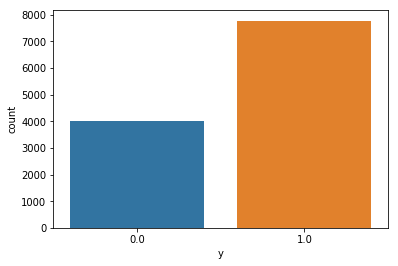

In [10]:
sns.countplot(paragraph_df["y"])

In [11]:
paragraph_df["wc"] = paragraph_df["text"].apply(lambda x: len(x.split()))
paragraph_df["pc"] = paragraph_df["text"].apply(lambda x: len(x.split("\n")))

/Users/shlomi/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


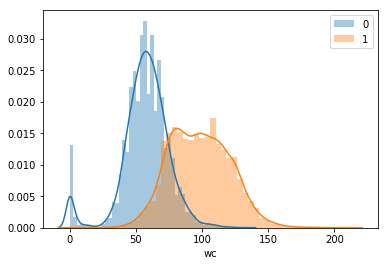

In [12]:
sns.distplot(paragraph_df[paragraph_df["y"] == 0]["wc"], label="0")
sns.distplot(paragraph_df[paragraph_df["y"] == 1]["wc"], label="1")
plt.legend()

In [13]:
paragraph_df["pc"].value_counts()

1    11797
Name: pc, dtype: int64

/Users/shlomi/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


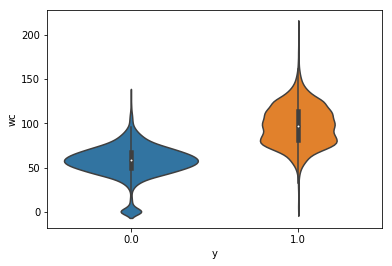

In [14]:
sns.violinplot(x="y", y ="wc", data=paragraph_df)

/Users/shlomi/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


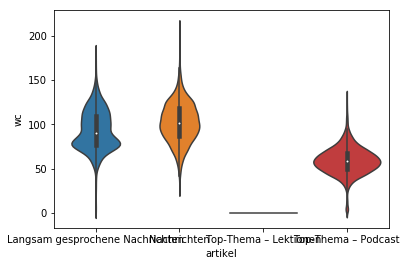

In [15]:
sns.violinplot(x="artikel", y ="wc", data=paragraph_df)

In [ ]:
from textstat.textstat import textstat
paragraph_df["FKG"] = paragraph_df["text"].apply(textstat.flesch_kincaid_grade)

sns.distplot(paragraph_df[paragraph_df["y"] == 0]["FKG"], label="0")
sns.distplot(paragraph_df[paragraph_df["y"] == 1]["FKG"], label="1")

plt.legend()
plt.title("Distribution Flesch-Kincaid Grade per Text by Reading Lables")

## Corpus Labels Anlyasis 

## Text

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf_vectors = tf_vectorizer.fit_transform(text_df["text"])
tf_feature_names = tf_vectorizer.get_feature_names()

### t-SNF by Articles & `y`

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(tf_vectors)
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=text_df["y"], marker="x")

### PCA

In [ ]:
from sklearn.decomposition import PCA

X_embedded = PCA(n_components=2, random_state=0).fit_transform(tf_vectors.toarray())

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=text_df["y"], marker="x")

### SVM

In [ ]:
from sklearn.linear_model import SGDClassifier

text_clf_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=0)
text_clf_svm.fit(tf_vectors.toarray(), text_df["y"].as_matrix())
predicted_svm = text_clf_svm.predict(tf_vectors.toarray())
np.mean(predicted_svm == text_df["y"])


## Paragraphs

In [ ]:
# Paragraph embedding - vis
# can we find pre-trained embedding?

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf_vectors = tf_vectorizer.fit_transform(paragraph_df["text"])
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD


X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(tf_vectors)
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=paragraph_df["y"], marker="x")

### PCA

In [ ]:
X_embedded = PCA(n_components=2, random_state=0).fit_transform(tf_vectors.toarray())

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=paragraph_df["y"], marker="x")

In [ ]:
from sklearn.linear_model import SGDClassifier

text_clf_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=0)
text_clf_svm.fit(tf_vectors.toarray(), paragraph_df["y"].as_matrix())
predicted_svm = text_clf_svm.predict(tf_vectors.toarray())
np.mean(predicted_svm == paragraph_df["y"])


## LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

no_features = 1000
no_topics = 20
no_top_words = 10

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
print("Preparing Data...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(text_df["text"])
tf_feature_names = tf_vectorizer.get_feature_names()

# Run LDA
print("Running LDA...")
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0, verbose=True).fit(tf)
print("Done!")

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, tf_feature_names, no_top_words)